In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import astropy
from astropy import units as u
plt.rcParams['text.usetex'] = True

In [116]:
# Constants
c = 2.998e10  # [c]=cm/s
M_Sun = 1.989e30  # [M_Sun]=kg
R_Sun = 6.96e10  # [R_Sun]=cm
R_M5 = 0.196*R_Sun  # [R_M5]=cm
R_WD = 0.001*R_Sun  # [R_WD]=cm
R_Arc = 25.4*R_Sun  # [R_Arc]=cm
R_NS = 12*1e5  # [R_NS]=cm
R_proto = 5*R_Sun  #[R_proto]=cm
T_Sun = 5800  # [T_Sun]=K
T_M5 = 2800  # [T_M5]=K
T_WD = 1e4  # [T_WD]=K
T_Arc = 4300  # [T_Arc]=K
T_NS = 1e6 # [T_NS] = K
T_proto = 3000  # [T_proto]=K
hc = 1240  # eVnm
hclambdamkT = 4.96  #hc/(lambda_m kT)=4.96, where lambda_mT=2.898e-3mK
k = 1/11604  # [k]=eV/K
sigma = 5.67e-5  # [sigma]=erg/s/cm^2/K^4

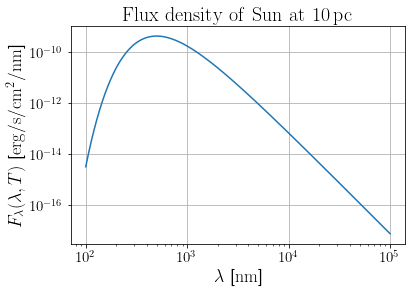

In [112]:
# Q3(a)
# isotropic radiation from star
def F_lambda_T(lambda_,T_):  # [F_lambda_T]=erg/s/cm^2/nm, [lambda_]=nm, [T_]=K
    return (c/4)*(8*np.pi/lambda_**4)*(hc/lambda_)*1.6e-19*1e7*(np.exp(hc/lambda_/k/T_)-1)**(-1)*1e21

# wavelength range
lambda_range = np.logspace(2,5,1000)  # [lambda_range]=nm, correspond to 0.01-100micron

plt.loglog(lambda_range, F_lambda_T(lambda_range, T_Sun)*(R_Sun/10/3.26/9.46e17)**2)
plt.title(r'$\rm{Flux\,\,density\,\,of\,\,Sun\,\,at\,\,10\,pc}$', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$\lambda$ [$\rm nm$]', size=18)
plt.ylabel(r'$F_\lambda(\lambda,T)$ [$\rm erg/s/cm^2/nm$]', size=18)
plt.grid()
plt.show()

In [110]:
# Q3(a): check above if coincide with sigma*T^4
np.sum(F_lambda_T(lambda_range,T_Sun)[:-1]*np.diff(lambda_range))/sigma/T_Sun**4  # \approx 1 then good

1.0019884705938538

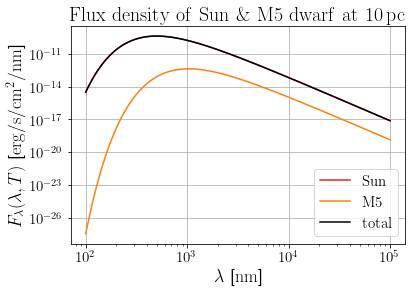

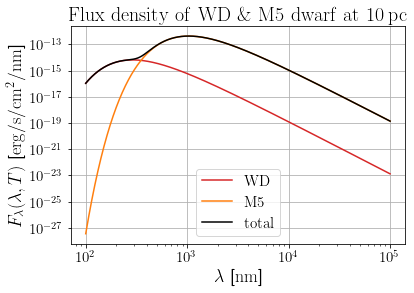

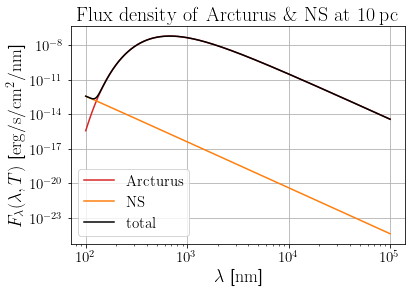

In [117]:
# Q3(b)
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_Sun)*(R_Sun/10/3.26/9.46e17)**2, 'tab:red', label=r'$\rm{Sun}$')
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_M5)*(R_M5/10/3.26/9.46e17)**2, 'tab:orange', label=r'$\rm{M5}$')
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_Sun)*(R_Sun/10/3.26/9.46e17)**2+F_lambda_T(lambda_range, T_M5)*(R_M5/10/3.26/9.46e17)**2, 'k', label=r'$\rm{total}$')
plt.title(r'$\rm{Flux\,\,density\,\,of\,\,Sun\,\,\&\,\,M5\,\,dwarf\,\,at\,\,10\,pc}$', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$\lambda$ [$\rm nm$]', size=18)
plt.ylabel(r'$F_\lambda(\lambda,T)$ [$\rm erg/s/cm^2/nm$]', size=18)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.loglog(lambda_range, F_lambda_T(lambda_range, T_WD)*(R_WD/10/3.26/9.46e17)**2, 'tab:red', label=r'$\rm{WD}$')
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_M5)*(R_M5/10/3.26/9.46e17)**2, 'tab:orange', label=r'$\rm{M5}$')
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_WD)*(R_WD/10/3.26/9.46e17)**2+F_lambda_T(lambda_range, T_M5)*(R_M5/10/3.26/9.46e17)**2, 'k', label=r'$\rm{total}$')
plt.title(r'$\rm{Flux\,\,density\,\,of\,\,WD\,\,\&\,\,M5\,\,dwarf\,\,at\,\,10\,pc}$', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$\lambda$ [$\rm nm$]', size=18)
plt.ylabel(r'$F_\lambda(\lambda,T)$ [$\rm erg/s/cm^2/nm$]', size=18)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.loglog(lambda_range, F_lambda_T(lambda_range, T_Arc)*(R_Arc/10/3.26/9.46e17)**2, 'tab:red', label=r'$\rm{Arcturus}$')
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_NS)*(R_NS/10/3.26/9.46e17)**2, 'tab:orange', label=r'$\rm{NS}$')
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_Arc)*(R_Arc/10/3.26/9.46e17)**2+F_lambda_T(lambda_range, T_NS)*(R_NS/10/3.26/9.46e17)**2, 'k', label=r'$\rm{total}$')
plt.title(r'$\rm{Flux\,\,density\,\,of\,\,Arcturus\,\,\&\,\,NS\,\,at\,\,10\,pc}$', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$\lambda$ [$\rm nm$]', size=18)
plt.ylabel(r'$F_\lambda(\lambda,T)$ [$\rm erg/s/cm^2/nm$]', size=18)
plt.legend(fontsize=15)
plt.grid()
plt.show()

#### Q3(b) discussion
M5 flux density is orders of magnitude lower than that of the Sun-like star in every wavelength, hence the total spectra is dominated by the Sun-like star and not discernible.  

For the plots of white dwarf & M5 dwarf and Arcturus & neutron star, the hotter objects has a higher flux density at lower wavelength given the Wien's displacement law, even though the radius is much smaller, it would still appears in the total spectra particularly at the point where the flux densities cross over.

#### Q3(c) derivations
Comparing with the total flux relation with surface temperature for a blackbody, the flux is found by assuming that radiation is only being given off in the outward direction: $$F_{\rm tot}=\sigma_{\rm B}T^4~,$$ but in the case of the spherical shell cloud in the problem, it could emit in both inward and outward direction, assuming thermal equilibrium is achieved in the thin shell, the temperatures on both sides are the same: $$F_{\rm in} + F_{\rm out} = 2\sigma_{\rm B}T_{\rm C}^4~.$$  For the cloud to remain at a constant temperature over time, the $F_{\rm output}$ (not to confuse with $F_{\rm out}$ where the ''in'' and ''out'' subscripts are all output radiation indicating directions) has to equal to the $F_{\rm abs}$, hence
\begin{align*}
    F_{\rm abs} = F_{\rm in} + F_{\rm out} &= 2\sigma_{\rm B}T_{\rm C}^4 \\
    T_{\rm C} &= \left(\frac{F_{\rm abs}}{2\sigma_{\rm B}}\right)^{1/4}~.
\end{align*}

To compute the total absorbed flux by the cloud $F_{\rm abs}$, we start from the flux density the central protostar emits $F_{\star,\nu}$, the flux density received at the inner surface of the cloud has to be corrected by $(R_\star/R_{\rm C})^2$ that drops as the inverse-square law, finally taking this as the flux density to be attenuated by the absorption, the $(1-e^{-\tau_\nu})$ term makes sure of the absorption approaches 100% when $\tau_\nu\rightarrow\infty$ and approaches 0% when $\tau_\nu\rightarrow0$.

In [143]:
# Q3(d)
R_C = 100*1.5e13
def tau_lambda(lambda_):
    return 3e17/3e14/lambda_

T_C = (np.sum((F_lambda_T(lambda_range, T_proto)*(R_proto/R_C)**2*(1-np.exp(-tau_lambda(lambda_range))))[:-1]*np.diff(lambda_range))/2/sigma)**(1/4)
T_C  # [T_C]=K

32.54203090878328

/Users/thomaswong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/thomaswong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


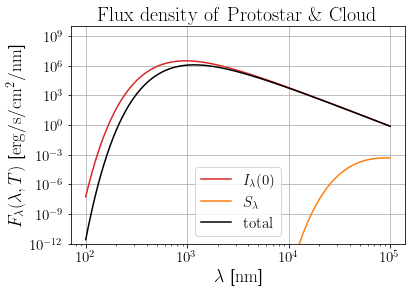

In [152]:
# Q3(e)
def I_lambda_T(lambda_,T_proto_,T_C_):
    return F_lambda_T(lambda_, T_proto_)*np.exp(-tau_lambda(lambda_)) + F_lambda_T(lambda_, T_C_)*(1-np.exp(-tau_lambda(lambda_)))

plt.loglog(lambda_range, F_lambda_T(lambda_range, T_proto), 'tab:red', label=r'$I_\lambda(0)$')
plt.loglog(lambda_range, F_lambda_T(lambda_range, T_C), 'tab:orange', label=r'$S_\lambda$')
plt.loglog(lambda_range, I_lambda_T(lambda_range,T_proto,T_C), 'k', label=r'$\rm{total}$')
plt.title(r'$\rm{Flux\,\,density\,\,of\,\,Protostar\,\,\&\,\,Cloud}$', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$\lambda$ [$\rm nm$]', size=18)
plt.ylabel(r'$F_\lambda(\lambda,T)$ [$\rm erg/s/cm^2/nm$]', size=18)
plt.legend(fontsize=15)
plt.ylim(1e-12,1e10)  # zoom into region of interest
plt.grid()
plt.show()

#### Q3(e) discussion
If the cloud and central protostar are an unresolved binary system, given the orders of magnitude lower flux density of the cloud's blackbody spectrum at every wavelength, the total cumulative blackbody spectrum will be dominated by that of the star and hence observation would not notice the existence of the cloud.  

When the protostar is surrounded by the cloud, the cloud is starts to become optically thick at 1 micron and smaller wavelengths, the absorption of the cloud is blocking out a non-negligible fraction of the protostar's spectrum at $\lambda\lesssim1\,\mu{\rm m}$.  Therefore observation will be able to see the deviation from a perfect blackbody and discover the surrounding cloud, even seeing approximately at which wavelength does the cloud become optically thick.